In [1]:
import pandas as pd

In [9]:
import time
start_time = time.time()

# Create empty dataframe; See http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.empty.html
dfAll=pd.DataFrame({'Name' : [],'Sex' : [],'Count' : [],'Year' : []})

print ('Started ...')
for year in range(1880,2016):
    filename = 'yob'+str(year)+'.txt'
    filepath = 'D:/0. MSBA_Courses/2-Programming-for-Analytics/Assignment/hw1/names/'+filename
    # Read a new file into a dataframe
    df = pd.read_csv(filepath, header=None)
    df.columns = ['Name', 'Sex', 'Count']
    df['Year'] = str(year)
    dfAll = pd.concat([dfAll,df])  
    
print('Done...')
print ('It took', round(time.time()-start_time,4), 'seconds to read all the data into a dataframe.')

Started ...
Done...
It took 5.3058 seconds to read all the data into a dataframe.


In [11]:
# Part 1, version 1
dfCount = dfAll['Count'].groupby(dfAll['Year']).sum()
# dfCount is a pandas Series
# Try this,
# dfCount.ix['1889']
# Or try this,
# myList = ['1880','1881','1950']
# dfCount.ix[myList]
s = '{:>5}'.format('Year')
s = s + '{:>10}'.format('Births')
print(s)
for myIndex, myValue in dfCount.iteritems():
    s = '{:>5}'.format(myIndex)
    s = s + '{:>10}'.format(str(int(myValue)))
    print (s)

 Year    Births
 1880    201482
 1881    192696
 1882    221534
 1883    216945
 1884    243463
 1885    240854
 1886    255319
 1887    247396
 1888    299474
 1889    288948
 1890    301401
 1891    286675
 1892    334377
 1893    325222
 1894    338692
 1895    351024
 1896    357486
 1897    346958
 1898    381461
 1899    339235
 1900    450312
 1901    345816
 1902    386734
 1903    381205
 1904    403496
 1905    423941
 1906    428461
 1907    465395
 1908    488658
 1909    511231
 1910    590719
 1911    644271
 1912    988059
 1913   1137094
 1914   1416325
 1915   1832479
 1916   1934423
 1917   2006798
 1918   2171173
 1919   2110271
 1920   2262732
 1921   2334466
 1922   2289237
 1923   2302513
 1924   2381651
 1925   2333317
 1926   2295866
 1927   2319167
 1928   2260682
 1929   2191868
 1930   2223041
 1931   2103795
 1932   2110903
 1933   1998953
 1934   2076390
 1935   2089451
 1936   2077252
 1937   2130258
 1938   2212192
 1939   2203166
 1940   2302300
 1941   

In [12]:
# Part 1, version 2
dfCount = dfAll['Count'].groupby(dfAll['Year']).sum()
# Convert series to data frame
dfCount = dfCount.to_frame()
# type(dfCount)
# Convert the index to a column
dfCount['index1'] = dfCount.index
dfCount.columns = ['Births','Year']
#dfCount.head()

s = '{:>5}'.format('Year')
s = s + '{:>10}'.format('Births')
print(s)
for idx, row in dfCount.iterrows():
    s = '{:>5}'.format(row["Year"])
    s = s + '{:>10}'.format(str(int((row["Births"]))))
    print(s)

 Year    Births
 1880    201482
 1881    192696
 1882    221534
 1883    216945
 1884    243463
 1885    240854
 1886    255319
 1887    247396
 1888    299474
 1889    288948
 1890    301401
 1891    286675
 1892    334377
 1893    325222
 1894    338692
 1895    351024
 1896    357486
 1897    346958
 1898    381461
 1899    339235
 1900    450312
 1901    345816
 1902    386734
 1903    381205
 1904    403496
 1905    423941
 1906    428461
 1907    465395
 1908    488658
 1909    511231
 1910    590719
 1911    644271
 1912    988059
 1913   1137094
 1914   1416325
 1915   1832479
 1916   1934423
 1917   2006798
 1918   2171173
 1919   2110271
 1920   2262732
 1921   2334466
 1922   2289237
 1923   2302513
 1924   2381651
 1925   2333317
 1926   2295866
 1927   2319167
 1928   2260682
 1929   2191868
 1930   2223041
 1931   2103795
 1932   2110903
 1933   1998953
 1934   2076390
 1935   2089451
 1936   2077252
 1937   2130258
 1938   2212192
 1939   2203166
 1940   2302300
 1941   

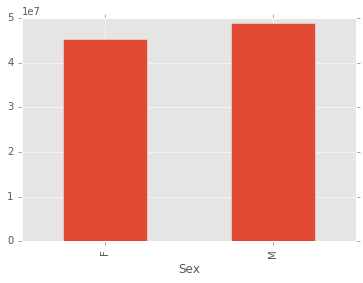

In [13]:
# Part 2
import matplotlib                # import the libraries to plot
%matplotlib inline              
matplotlib.style.use('ggplot')   # set the plot style to ggplot type

# Exceute the condition provided in the assignment
dfSubset = dfAll[ (dfAll['Year'] >= '1990') & (dfAll['Year'] <= '2014') ]
# Subset by sex and sum the variable of interest 
dfCountBySex = dfSubset['Count'].groupby(dfSubset['Sex']).sum()
# dfCountBySex                     # Display the data frame
dfCountBySex.plot.bar()            # Draw the bar plot

In [14]:
# Part 3
# Useful reference: http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html
# Prepare header
s = ''
s = '{:>5}'.format('Year')
s = s + '{:>10}'.format('Name 1')
s = s + '{:>10}'.format('Name 2')
s = s + '{:>10}'.format('Name 3')
s = s + '{:>10}'.format('Name 4')
s = s + '{:>10}'.format('Name 5')
# Print header
print (s)
# Now go through all the years for the report
for i in range(1950,1954):
    fn = dfAll[(dfAll['Year'] == str(i))]                   # Create a data frame for a matching year
    fn = fn.sort_values('Count', ascending=False).head(5)   # Sort by count and retain the top five rows
    s = ''
    s = s = s + '{:>5}'.format(str(i))
    # Now iterate through the data frame with five records
    for idx, row in fn.iterrows():
        s = s + '{:>10}'.format(row["Name"])
    print(s)

 Year    Name 1    Name 2    Name 3    Name 4    Name 5
 1950     James    Robert     Linda      John      Mary
 1951     James    Robert      John     Linda   Michael
 1952     James    Robert      John   Michael     David
 1953    Robert     James   Michael      John     David


 Year     Female1     Female2     Female3       Male1       Male2       Male3
 2010    Isabella      Sophia        Emma       Jacob       Ethan     Michael
 2011      Sophia    Isabella        Emma       Jacob       Mason     William
 2012      Sophia        Emma    Isabella       Jacob       Mason       Ethan
 2013      Sophia        Emma      Olivia        Noah        Liam       Jacob
 2014        Emma      Olivia      Sophia        Noah        Liam       Mason
 2015        Emma      Olivia      Sophia        Noah        Liam       Mason


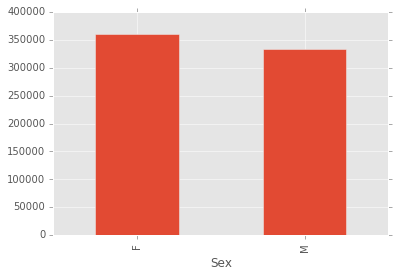

In [15]:
# Part 4
# Useful reference: http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

# Prepare header
s = ''
s = '{:>5}'.format('Year')
s = s + '{:>12}'.format('Female1')
s = s + '{:>12}'.format('Female2')
s = s + '{:>12}'.format('Female3')
s = s + '{:>12}'.format('Male1')
s = s + '{:>12}'.format('Male2')
s = s + '{:>12}'.format('Male3')
# Print header
print (s)

# creat a dataframe for concatanating the data of each year
totalgraph=pd.DataFrame({'Count' : [],'Name' : [],'Sex' : [],'Year': []})

# Now go through all the years for the report
for i in range(2010,2016):
    #
    fnFemale = dfAll[(dfAll['Year'] == str(i)) & (dfAll['Sex'] == 'F')] 
    fnMale = dfAll[(dfAll['Year'] == str(i)) & (dfAll['Sex'] == 'M')] 
    # sort by Count and retain the top three
    fn1 = fnFemale.sort_values('Count', ascending=False).head(3)  
    fn2 = fnMale.sort_values('Count', ascending=False).head(3)
    # concatanate the female data and male data
    FandM = pd.concat([fn1,fn2])
    #print(FandM)
    # concatanate the data of each year in the new blank dataframe
    totalgraph = pd.concat([totalgraph,FandM])
    
    #print the table
    s = ''
    s = s + '{:>5}'.format(str(i))

    for idx, row in FandM.iterrows():
        s = s + '{:>12}'.format(row["Name"])
    # for idx, row in fn2.iterrows():
    #    s = s + '{:>10}'.format(row["Name"])
    print(s)


#print(totalgraph)

import matplotlib                # import the libraries to plot
%matplotlib inline              
matplotlib.style.use('ggplot')   # set the plot style to ggplot type


dfCountBySex = totalgraph['Count'].groupby(totalgraph['Sex']).sum()
# dfCountBySex                     # Display the data frame
dfCountBySex.plot.bar()            # Draw the bar plot

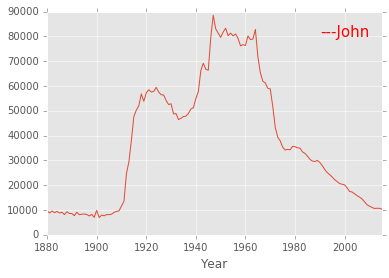

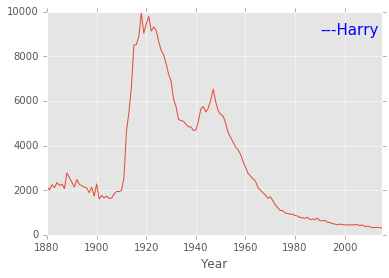

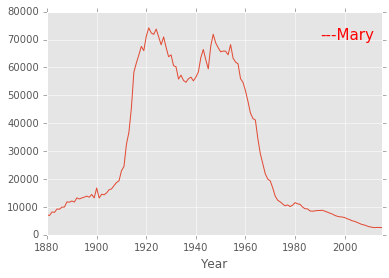

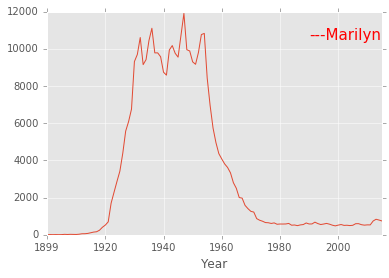

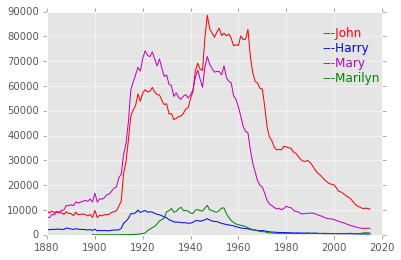

In [16]:
# Part 5
FnJ = dfAll[(dfAll['Name'] == 'John')]
FnJ = FnJ['Count'].groupby(FnJ['Year']).sum()

FnH = dfAll[(dfAll['Name'] == 'Harry')]
FnH = FnH['Count'].groupby(FnH['Year']).sum()

FnM = dfAll[(dfAll['Name'] == 'Mary')]
FnM = FnM['Count'].groupby(FnM['Year']).sum()

FnMln = dfAll[(dfAll['Name'] == 'Marilyn')]
FnMln = FnMln['Count'].groupby(FnMln['Year']).sum()

import matplotlib.pyplot as plt

plt.figure(1)

FnJ.plot().text(110,80000,'---John',color='r',fontsize=15)

plt.figure(2)
FnH.plot().text(110,9000,'---Harry',color='b',fontsize=15)

plt.figure(3)
FnM.plot().text(110,70000,'---Mary',color='r',fontsize=15)

plt.figure(4)
FnMln.plot().text(90,10500,'---Marilyn',color='r',fontsize=15)


plt.figure(5)
plt.plot(FnJ,'r')
plt.text(1995,80000,'---John',color='r',fontsize=12)
plt.plot(FnH,'b')
plt.text(1995,74000,'---Harry',color='b',fontsize=12)
plt.plot(FnM,'m')
plt.text(1995,68000,'---Mary',color='m',fontsize=12)
plt.plot(FnMln,'g')
plt.text(1995,62000,'---Marilyn',color='g',fontsize=12)


                    Count
Name                     
Michael      1.062593e+09
Robert       8.142879e+08
James        7.432922e+08
David        6.637683e+08
John         6.500145e+08
Mary         6.426800e+08
Linda        4.569453e+08
Jennifer     4.104439e+08
Christopher  3.712847e+08
William      3.246544e+08


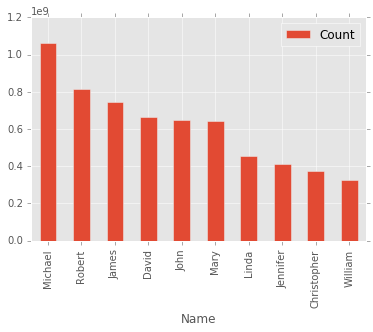

In [17]:
#Part 6
# Exe=ceute the condition in the assignment
#dfSubset = dfAll[(dfAll['Year'] == '2010')]
dfCountByName = dfAll.groupby(['Name','Year']).sum()
t = dfCountByName.reset_index()
q = t.groupby('Name').var()
h = q.sort_values('Count', ascending=False).head(10)
print(h)

import matplotlib.pyplot as plt

plt.figure(1)
h.plot.bar()